# Fig 1.29 emissions

Plotting the emissions which appear in Fig 1.29

## Authors

All notebooks and plots in this repository were generated by the following authors:

- Zebedee Nicholls zebedee.nicholls@climate-energy-college.org
- Jared Lewis jared.lewis@climate-resource.com
- Malte Meinshausen malte.meinshausen@unimelb.edu.au

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [3]:
import glob
import os.path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scmdata
import seaborn as sns
import statsmodels.api as sm
import tqdm.autonotebook as tqdman

import utils
import utils.plotting

<IPython.core.display.Javascript object>

/data/ubuntu-znicholls/miniconda3/envs/ar6-wg1-plots-and-processing/lib/python3.7/site-packages/ipykernel_launcher.py:10: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  # Remove the CWD from sys.path while we load stuff.


<IPython.core.display.Javascript object>

In [4]:
plt.rcParams["pdf.use14corefonts"] = True
plt.rcParams["text.usetex"] = False
plt.rcParams["axes.unicode_minus"] = False

<IPython.core.display.Javascript object>

In [5]:
REF_YEAR = 2013

<IPython.core.display.Javascript object>

In [6]:
inp = scmdata.ScmRun(
    os.path.join(utils.DATA_DIR, "raw", "sr15-scenarios", "sr15_scenarios.csv"),
    lowercase_cols=True,
)
inp

<ScmRun (timeseries: 9453, timepoints: 30)>
Time:
	Start: 2000-01-01T00:00:00
	End: 2105-01-01T00:00:00
Meta:
	                  model region                scenario       unit  \
	0               AIM_2_0  World  ADVANCE_2020_1.5C-2100  Mt CO2/yr   
	1               AIM_2_0  World      ADVANCE_2020_Med2C  Mt CO2/yr   
	2               AIM_2_0  World       ADVANCE_2020_WB2C  Mt CO2/yr   
	3               AIM_2_0  World      ADVANCE_2030_Med2C  Mt CO2/yr   
	4               AIM_2_0  World  ADVANCE_2030_Price1.5C  Mt CO2/yr   
	...                 ...    ...                     ...        ...   
	9448  WITCH-GLOBIOM_4_4  World            CD-LINKS_NPi  Mt SO2/yr   
	9449  WITCH-GLOBIOM_4_4  World   CD-LINKS_NPi2020_1000  Mt SO2/yr   
	9450  WITCH-GLOBIOM_4_4  World   CD-LINKS_NPi2020_1600  Mt SO2/yr   
	9451  WITCH-GLOBIOM_4_4  World    CD-LINKS_NPi2020_400  Mt SO2/yr   
	9452  WITCH-GLOBIOM_4_4  World       CD-LINKS_NoPolicy  Mt SO2/yr   
	
	                 variable  
	0     Emissions|CO

<IPython.core.display.Javascript object>

In [7]:
# interpolate onto annual grid
inp = inp.resample("AS")

<IPython.core.display.Javascript object>

time                                                                                                                         2000-01-01  \
model   reference_period_end_year reference_period_start_year region scenario               unit   variable                               
AIM_2_0 2013                      2013                        World  ADVANCE_2020_1.5C-2100 Gt CO2 Cumulative Emissions|CO2 -442.710636   
                                                                     ADVANCE_2020_Med2C     Gt CO2 Cumulative Emissions|CO2 -442.700730   
                                                                     ADVANCE_2020_WB2C      Gt CO2 Cumulative Emissions|CO2 -442.700730   
                                                                     ADVANCE_2030_Med2C     Gt CO2 Cumulative Emissions|CO2 -442.700399   
                                                                     ADVANCE_2030_Price1.5C Gt CO2 Cumulative Emissions|CO2 -443.156070   

time                                                                                                                         2001-01-01  \
model   reference_period_end_year reference_period_start_year region scenario               unit   variable                               
AIM_2_0 2013                      2013                        World  ADVANCE_2020_1.5C-2100 Gt CO2 Cumulative Emissions|CO2 -413.479285   
                                                                     ADVANCE_2020_Med2C     Gt CO2 Cumulative Emissions|CO2 -413.469379   
                                                                     ADVANCE_2020_WB2C      Gt CO2 Cumulative Emissions|CO2 -413.469379   
                                                                     ADVANCE_2030_Med2C     Gt CO2 Cumulative Emissions|CO2 -413.469049   
                                                                     ADVANCE_2030_Price1.5C Gt CO2 Cumulative Emissions|CO2 -413.924719   

time                                                                                                                         2002-01-01  \
model   reference_period_end_year reference_period_start_year region scenario               unit   variable                               
AIM_2_0 2013                      2013                        World  ADVANCE_2020_1.5C-2100 Gt CO2 Cumulative Emissions|CO2 -383.783858   
                                                                     ADVANCE_2020_Med2C     Gt CO2 Cumulative Emissions|CO2 -383.773952   
                                                                     ADVANCE_2020_WB2C      Gt CO2 Cumulative Emissions|CO2 -383.773952   
                                                                     ADVANCE_2030_Med2C     Gt CO2 Cumulative Emissions|CO2 -383.773622   
                                                                     ADVANCE_2030_Price1.5C Gt CO2 Cumulative Emissions|CO2 -384.229292   

time                                                                                                                         2003-01-01  \
model   reference_period_end_year reference_period_start_year region scenario               unit   variable                               
AIM_2_0 2013                      2013                        World  ADVANCE_2020_1.5C-2100 Gt CO2 Cumulative Emissions|CO2 -353.202071   
                                                                     ADVANCE_2020_Med2C     Gt CO2 Cumulative Emissions|CO2 -353.192165   
                                                                     ADVANCE_2020_WB2C      Gt CO2 Cumulative Emissions|CO2 -353.192165   
                                                                     ADVANCE_2030_Med2C     Gt CO2 Cumulative Emissions|CO2 -353.191835   
                                                                     ADVANCE_2030_Price1.5C Gt CO2 Cumulative Emissions|CO2 -353.647505   

time                                                                                                    

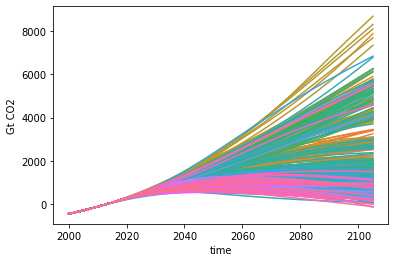

<IPython.core.display.Javascript object>

In [8]:
cumulative_co2 = (
    inp.filter(variable="Emissions|CO2|AFOLU")
    .add(
        inp.filter(variable="Emissions|CO2|Energy and Industrial Processes"),
        op_cols={"variable": "Emissions|CO2"},
    )
    .integrate()
    .convert_unit("Gt CO2")
    .relative_to_ref_period_mean(year=REF_YEAR)
)
display(cumulative_co2.head())
cumulative_co2.lineplot(units="model", estimator=None, legend=False)

In [9]:
inp["variable"].unique()

array(['Emissions|CO2|AFOLU',
       'Emissions|CO2|Energy and Industrial Processes', 'Emissions|BC',
       'Emissions|PFC|C2F6', 'Emissions|PFC|C6F14', 'Emissions|PFC|CF4',
       'Emissions|CH4', 'Emissions|CO', 'Emissions|HFC|HFC125',
       'Emissions|HFC|HFC134a', 'Emissions|HFC|HFC143a',
       'Emissions|HFC|HFC227ea', 'Emissions|HFC|HFC23',
       'Emissions|HFC|HFC245fa', 'Emissions|HFC|HFC32',
       'Emissions|HFC|HFC4310', 'Emissions|N2O', 'Emissions|NH3',
       'Emissions|VOC', 'Emissions|NOx', 'Emissions|OC', 'Emissions|SF6',
       'Emissions|Sulfur'], dtype=object)

<IPython.core.display.Javascript object>

In [10]:
ghg_vars = [
    "Emissions|CO2|AFOLU",
    "Emissions|CO2|Energy and Industrial Processes",
    #     "Emissions|BC",
    "Emissions|PFC|C2F6",
    "Emissions|PFC|C6F14",
    "Emissions|PFC|CF4",
    "Emissions|CH4",
    #     "Emissions|CO",
    "Emissions|HFC|HFC125",
    "Emissions|HFC|HFC134a",
    "Emissions|HFC|HFC143a",
    "Emissions|HFC|HFC227ea",
    "Emissions|HFC|HFC23",
    "Emissions|HFC|HFC245fa",
    "Emissions|HFC|HFC32",
    "Emissions|HFC|HFC4310",
    "Emissions|N2O",
    #     "Emissions|NH3",
    #     "Emissions|VOC",
    #     "Emissions|NOx",
    #     "Emissions|OC",
    "Emissions|SF6",
    #     "Emissions|Sulfur",
]

<IPython.core.display.Javascript object>

In [11]:
def calculate_ghg_eqs(
    inp, ghg_vars=ghg_vars, gwps=["AR4GWP100", "AR5GWP100", "AR6GWP100"]
):
    inp = inp.interpolate(inp["time"])

    out = []
    for gwp in gwps:
        ghg = (
            inp.filter(variable=ghg_vars)
            .convert_unit("GtCO2 / yr", context=gwp)
            .timeseries()
        )

        grouper_cols = list(set(ghg.index.names) - {"variable"})
        ghg = ghg.groupby(grouper_cols).sum()
        ghg["variable"] = "Emissions|GHGs"
        ghg = scmdata.ScmRun(ghg)
        out.append(ghg)

    return scmdata.run_append(out)

<IPython.core.display.Javascript object>

In [12]:
def calculate_cumulative_ghg(inp, context="AR4GWP100"):
    out = (
        inp.filter(unit_context=context)
        .integrate()
        .convert_unit("Gt CO2", context=context)
        .relative_to_ref_period_mean(year=REF_YEAR)
    )

    return out

<IPython.core.display.Javascript object>

In [13]:
ghgs = calculate_ghg_eqs(inp)
ghgs

<ScmRun (timeseries: 1233, timepoints: 106)>
Time:
	Start: 2000-01-01T00:00:00
	End: 2105-01-01T00:00:00
Meta:
	                  model region                scenario        unit  \
	0               AIM_2_0  World  ADVANCE_2020_1.5C-2100  GtCO2 / yr   
	1               AIM_2_0  World      ADVANCE_2020_Med2C  GtCO2 / yr   
	2               AIM_2_0  World       ADVANCE_2020_WB2C  GtCO2 / yr   
	3               AIM_2_0  World      ADVANCE_2030_Med2C  GtCO2 / yr   
	4               AIM_2_0  World  ADVANCE_2030_Price1.5C  GtCO2 / yr   
	...                 ...    ...                     ...         ...   
	1228  WITCH-GLOBIOM_4_4  World            CD-LINKS_NPi  GtCO2 / yr   
	1229  WITCH-GLOBIOM_4_4  World   CD-LINKS_NPi2020_1000  GtCO2 / yr   
	1230  WITCH-GLOBIOM_4_4  World   CD-LINKS_NPi2020_1600  GtCO2 / yr   
	1231  WITCH-GLOBIOM_4_4  World    CD-LINKS_NPi2020_400  GtCO2 / yr   
	1232  WITCH-GLOBIOM_4_4  World       CD-LINKS_NoPolicy  GtCO2 / yr   
	
	     unit_context        variable 

<IPython.core.display.Javascript object>

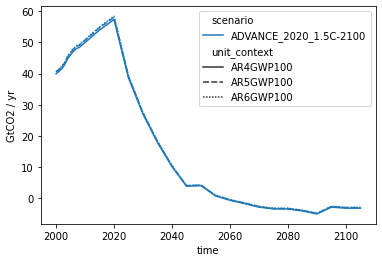

<IPython.core.display.Javascript object>

In [14]:
ghgs.filter(model="AIM_2_0", scenario="ADVANCE_2020_1.5C-2100").lineplot(
    style="unit_context", time_axis="year"
)

time                                                                                                                                       2000-01-01  \
model   reference_period_end_year reference_period_start_year region scenario               unit   unit_context variable                                
AIM_2_0 2013                      2013                        World  ADVANCE_2020_1.5C-2100 Gt CO2 AR4GWP100    Cumulative Emissions|GHGs -606.879295   
                                                                     ADVANCE_2020_Med2C     Gt CO2 AR4GWP100    Cumulative Emissions|GHGs -606.799392   
                                                                     ADVANCE_2020_WB2C      Gt CO2 AR4GWP100    Cumulative Emissions|GHGs -606.868895   
                                                                     ADVANCE_2030_Med2C     Gt CO2 AR4GWP100    Cumulative Emissions|GHGs -606.968959   
                                                                     ADVANCE_2030_Price1.5C Gt CO2 AR4GWP100    Cumulative Emissions|GHGs -607.496641   

time                                                                                                                                       2001-01-01  \
model   reference_period_end_year reference_period_start_year region scenario               unit   unit_context variable                                
AIM_2_0 2013                      2013                        World  ADVANCE_2020_1.5C-2100 Gt CO2 AR4GWP100    Cumulative Emissions|GHGs -566.493310   
                                                                     ADVANCE_2020_Med2C     Gt CO2 AR4GWP100    Cumulative Emissions|GHGs -566.413407   
                                                                     ADVANCE_2020_WB2C      Gt CO2 AR4GWP100    Cumulative Emissions|GHGs -566.482910   
                                                                     ADVANCE_2030_Med2C     Gt CO2 AR4GWP100    Cumulative Emissions|GHGs -566.582974   
                                                                     ADVANCE_2030_Price1.5C Gt CO2 AR4GWP100    Cumulative Emissions|GHGs -567.110655   

time                                                                                                                                       2002-01-01  \
model   reference_period_end_year reference_period_start_year region scenario               unit   unit_context variable                                
AIM_2_0 2013                      2013                        World  ADVANCE_2020_1.5C-2100 Gt CO2 AR4GWP100    Cumulative Emissions|GHGs -525.406654   
                                                                     ADVANCE_2020_Med2C     Gt CO2 AR4GWP100    Cumulative Emissions|GHGs -525.326751   
                                                                     ADVANCE_2020_WB2C      Gt CO2 AR4GWP100    Cumulative Emissions|GHGs -525.396255   
                                                                     ADVANCE_2030_Med2C     Gt CO2 AR4GWP100    Cumulative Emissions|GHGs -525.496318   
                                                                     ADVANCE_2030_Price1.5C Gt CO2 AR4GWP100    Cumulative Emissions|GHGs -526.024000   

time                                                                                                                                       2003-01-01  \
model   reference_period_end_year reference_period_start_year region scenario               unit   unit_context variable                                
AIM_2_0 2013                      2013                        World  ADVANCE_2020_1.5C-2100 Gt CO2 AR4GWP100    Cumulative Emissions|GHGs -483.233296   
                                                                     ADVANCE_2020_Med2C     Gt CO2 AR4GWP100    Cumulative Emissions|GHGs -483.153393   
                                                                     ADVANCE_2020_WB2C      Gt CO2 AR4GWP100    Cumulative Emissions|GHGs -483.222896   
                   

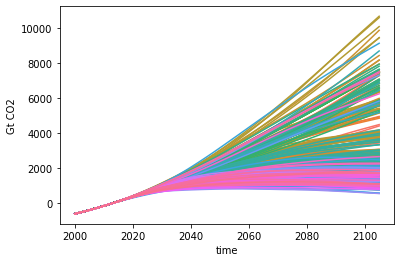

<IPython.core.display.Javascript object>

In [15]:
cumulative_ghg_ar4gwp100 = calculate_cumulative_ghg(ghgs, context="AR4GWP100")

display(cumulative_ghg_ar4gwp100.head())
cumulative_ghg_ar4gwp100.lineplot(
    units="model", estimator=None, legend=False, time_axis="year"
)

In [16]:
ghgs_cumulative = []
for ghgeq in ghgs.groupby("unit_context"):
    ghgeq_cumulative = calculate_cumulative_ghg(
        ghgeq, context=ghgeq.get_unique_meta("unit_context", True)
    )
    ghgs_cumulative.append(ghgeq_cumulative)

ghgs_cumulative = scmdata.run_append(ghgs_cumulative)
ghgs_cumulative

<ScmRun (timeseries: 1233, timepoints: 106)>
Time:
	Start: 2000-01-01T00:00:00
	End: 2105-01-01T00:00:00
Meta:
	                  model  reference_period_end_year  \
	0               AIM_2_0                       2013   
	1               AIM_2_0                       2013   
	2               AIM_2_0                       2013   
	3               AIM_2_0                       2013   
	4               AIM_2_0                       2013   
	...                 ...                        ...   
	1228  WITCH-GLOBIOM_4_4                       2013   
	1229  WITCH-GLOBIOM_4_4                       2013   
	1230  WITCH-GLOBIOM_4_4                       2013   
	1231  WITCH-GLOBIOM_4_4                       2013   
	1232  WITCH-GLOBIOM_4_4                       2013   
	
	      reference_period_start_year region                scenario    unit  \
	0                            2013  World  ADVANCE_2020_1.5C-2100  Gt CO2   
	1                            2013  World      ADVANCE_2020_Med2C  Gt CO2

<IPython.core.display.Javascript object>

In [17]:
def pivot_out_time(inp, incl_unit_context=False):
    meta = [
        "model",
        "scenario",
        "reference_period_start_year",
        "reference_period_end_year",
        "unit",
        "variable",
    ]
    if incl_unit_context:
        meta.append("unit_context")

    return (
        inp.timeseries(
            time_axis="year",
            meta=meta,
        )
        .unstack("variable")
        .stack("time")
    )

<IPython.core.display.Javascript object>

In [18]:
pivot_df = pd.concat(
    pivot_out_time(cumulative_co2).align(
        pivot_out_time(ghgs_cumulative, incl_unit_context=True), axis=0
    ),
    axis=1,
)
pivot_df

variable                                                                                                                 Cumulative Emissions|CO2  \
model             scenario               reference_period_start_year reference_period_end_year unit   time unit_context                             
AIM_2_0           ADVANCE_2020_1.5C-2100 2013                        2013                      Gt CO2 2000 AR4GWP100                  -442.710636   
                                                                                                           AR5GWP100                  -442.710636   
                                                                                                           AR6GWP100                  -442.710636   
                                                                                                      2001 AR4GWP100                  -413.479285   
                                                                                                           AR5GWP100                  -413.479285   
...                                                                                                                                           ...   
WITCH-GLOBIOM_4_4 CD-LINKS_NoPolicy      2013                        2013                      Gt CO2 2104 AR5GWP100                  6156.706730   
                                                                                                           AR6GWP100                  6156.706730   
                                                                                                      2105 AR4GWP100                  6237.339896   
                                                                                                           AR5GWP100                  6237.339896   
                                                                                                           AR6GWP100                  6237.339896   

variable                                                                                                                 Cumulative Emissions|GHGs  
model             scenario               reference_period_start_year reference_period_end_year unit   time unit_context                             
AIM_2_0           ADVANCE_2020_1.5C-2100 2013                        2013                      Gt CO2 2000 AR4GWP100                   -606.879295  
                                                                                                           AR5GWP100                   -615.627938  
                                                                                                           AR6GWP100                   -617.675793  
                                                                                                      2001 AR4GWP100                   -566.493310  
                                                                                                           AR5GWP100                   -574.657017  
...                                                                                                                                            ...  
WITCH-GLOBIOM_4_4 CD-LINKS_NoPolicy      2013                        2013                      Gt CO2 2104 AR5GWP100                   7799.257700  
                                                                                                           AR6GWP100                   7846.255529  
                                                                                                      2105 AR4GWP100                   7820.153143  
                                                                                                           AR5GWP100                   7898.516245  
                                                                                                           AR6GWP100                   7946.268960  

[130698 rows x 2 columns]

<IPython.core.display.Javascript object>

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Cumulative Emissions|GHGs   R-squared:                       0.989
Model:                                   OLS   Adj. R-squared:                  0.988
Method:                        Least Squares   F-statistic:                 3.516e+04
Date:                       Wed, 23 Feb 2022   Prob (F-statistic):               0.00
Time:                               05:47:41   Log-Likelihood:                -2215.7
No. Observations:                        411   AIC:                             4435.
Df Residuals:                            409   BIC:                             4443.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      175.6838      8.596     20.439      0.000     158.787     192.581
Cumulative Emissions|CO2     1.2314      0.007    187.516      0.000       1.219       1.244
==============================================================================
Omnibus:                        9.404   Durbin-Watson:                   0.860
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.571
Skew:                           0.351   Prob(JB):                      0.00835
Kurtosis:                       2.746   Cond. No.                     4.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

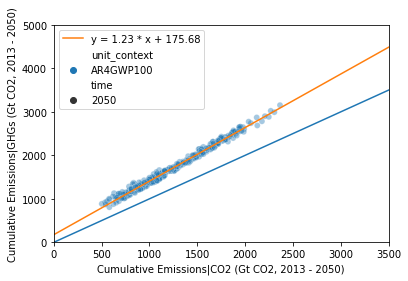

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Cumulative Emissions|GHGs   R-squared:                       0.988
Model:                                   OLS   Adj. R-squared:                  0.988
Method:                        Least Squares   F-statistic:                 3.325e+04
Date:                       Wed, 23 Feb 2022   Prob (F-statistic):               0.00
Time:                               05:47:41   Log-Likelihood:                -2231.6
No. Observations:                        411   AIC:                             4467.
Df Residuals:                            409   BIC:                             4475.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      181.2656      8.934     20.289      0.000     163.703     198.828
Cumulative Emissions|CO2     1.2446      0.007    182.338      0.000       1.231       1.258
==============================================================================
Omnibus:                        9.584   Durbin-Watson:                   0.863
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.555
Skew:                           0.343   Prob(JB):                      0.00842
Kurtosis:                       2.702   Cond. No.                     4.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

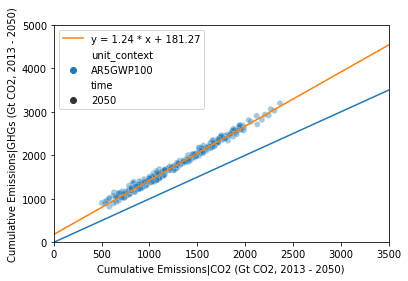

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Cumulative Emissions|GHGs   R-squared:                       0.987
Model:                                   OLS   Adj. R-squared:                  0.987
Method:                        Least Squares   F-statistic:                 3.138e+04
Date:                       Wed, 23 Feb 2022   Prob (F-statistic):               0.00
Time:                               05:47:41   Log-Likelihood:                -2245.9
No. Observations:                        411   AIC:                             4496.
Df Residuals:                            409   BIC:                             4504.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      181.4587      9.251     19.616      0.000     163.274     199.643
Cumulative Emissions|CO2     1.2519      0.007    177.130      0.000       1.238       1.266
==============================================================================
Omnibus:                       10.201   Durbin-Watson:                   0.871
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.041
Skew:                           0.347   Prob(JB):                      0.00660
Kurtosis:                       2.677   Cond. No.                     4.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

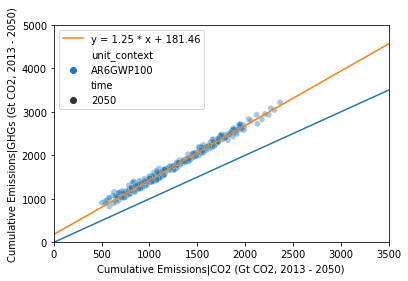

<IPython.core.display.Javascript object>

In [19]:
xlim = [0, 3500]

pdf = pivot_df.reset_index()
unit = pdf["unit"].unique()
assert len(unit) == 1
unit = unit[0]

reference_period_start_year = pdf["reference_period_start_year"].unique()
assert len(reference_period_start_year) == 1
reference_period_start_year = reference_period_start_year[0]

reference_period_end_year = pdf["reference_period_end_year"].unique()
assert len(reference_period_end_year) == 1
reference_period_end_year = reference_period_end_year[0]

assert reference_period_start_year == reference_period_end_year

for gwp in [
    "AR4GWP100",
    "AR5GWP100",
    "AR6GWP100",
]:
    for year in [2050]:
        data = pdf[(pdf["time"] == year) & (pdf["unit_context"] == gwp)]

        X = sm.add_constant(data["Cumulative Emissions|CO2"])
        mod = sm.OLS(data["Cumulative Emissions|GHGs"], X)
        res = mod.fit()
        display(res.summary())

        y_int = res.params["const"]
        gradient = res.params["Cumulative Emissions|CO2"]

        ax = sns.scatterplot(
            data=data,
            x="Cumulative Emissions|CO2",
            y="Cumulative Emissions|GHGs",
            alpha=0.4,
            #     hue="time",
            #     style="unit_context",
            hue="unit_context",
            style="time",
        )
        ax.set_ylim([0, 5000])
        ax.set_xlim(xlim)
        ax.set_xlabel(
            f"{ax.get_xlabel()} ({unit}, {reference_period_start_year} - {year})"
        )
        ax.set_ylabel(
            f"{ax.get_ylabel()} ({unit}, {reference_period_start_year} - {year})"
        )

        ax.plot(ax.get_ylim(), ax.get_ylim())
        ax.plot(
            xlim,
            np.array(xlim) * gradient + y_int,
            label=f"y = {gradient:.2f} * x + {y_int:.2f}",
        )
        ax.legend()
        #         plt.savefig(f"{gwp}_{year}.pdf")
        plt.show()

## Comparing GWPs

unit_context              model                scenario  \
0                       AIM_2_0  ADVANCE_2020_1.5C-2100   
1                       AIM_2_0  ADVANCE_2020_1.5C-2100   
2                       AIM_2_0  ADVANCE_2020_1.5C-2100   
3                       AIM_2_0  ADVANCE_2020_1.5C-2100   
4                       AIM_2_0  ADVANCE_2020_1.5C-2100   
...                         ...                     ...   
43561         WITCH-GLOBIOM_4_4       CD-LINKS_NoPolicy   
43562         WITCH-GLOBIOM_4_4       CD-LINKS_NoPolicy   
43563         WITCH-GLOBIOM_4_4       CD-LINKS_NoPolicy   
43564         WITCH-GLOBIOM_4_4       CD-LINKS_NoPolicy   
43565         WITCH-GLOBIOM_4_4       CD-LINKS_NoPolicy   

unit_context  reference_period_start_year  reference_period_end_year    unit  \
0                                    2013                       2013  Gt CO2   
1                                    2013                       2013  Gt CO2   
2                                    2013                       2013  Gt CO2   
3                                    2013                       2013  Gt CO2   
4                                    2013                       2013  Gt CO2   
...                                   ...                        ...     ...   
43561                                2013                       2013  Gt CO2   
43562                                2013                       2013  Gt CO2   
43563                                2013                       2013  Gt CO2   
43564                                2013                       2013  Gt CO2   
43565                                2013                       2013  Gt CO2   

unit_context  time    AR4GWP100    AR5GWP100    AR6GWP100  
0             2000  -606.879295  -615.627938  -617.675793  
1             2001  -566.493310  -574.657017  -576.585612  
2             2002  -525.406654  -532.971949  -534.776459  
3             2003  -483.233296  -490.186890  -491.862430  
4             2004  -439.476403  -445.801239  -447.342875  
...            ...          ...          ...          ...  
43561         2101  7426.848834  7502.295658  7547.035020  
43562         2102  7525.107611  7601.283005  7646.775190  
43563         2103  7623.366388  7700.270352  7746.515360  
43564         2104  7721.625164  7799.257700  7846.255529  
43565         2105  7820.153143  7898.516245  7946.268960  

[43566 rows x 9 columns]

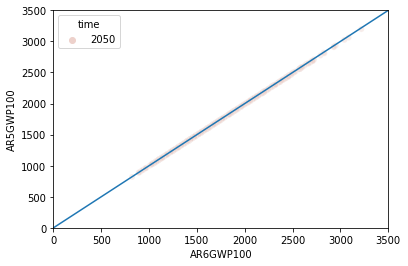

<IPython.core.display.Javascript object>

In [20]:
tmp = pivot_df["Cumulative Emissions|GHGs"].unstack("unit_context").reset_index()
ax = sns.scatterplot(
    data=tmp[tmp["time"] == 2050],
    #     x="AR4GWP100",
    #     y="AR6GWP100",
    x="AR6GWP100",
    y="AR5GWP100",
    alpha=0.4,
    hue="time",
)
ax.set_ylim([0, 3500])
ax.set_xlim([0, 3500])
ax.plot(ax.get_ylim(), ax.get_ylim())
tmp

## Comparing with RCMIP

In [21]:
rcmip_data = scmdata.ScmRun(
    os.path.join(
        utils.DATA_DIR, "raw", "rcmip", "rcmip-emissions-annual-means-v5-1-0.csv"
    ),
    lowercase_cols=True,
)

<IPython.core.display.Javascript object>

In [22]:
def tweak_var_name(v):
    return (
        v.replace("|F-Gases|", "|")
        .replace("MAGICC ", "")
        .replace("HFC4310mee", "HFC4310")
        .replace("Fossil and Industrial", "Energy and Industrial Processes")
    )


rcmip_data["variable"] = rcmip_data["variable"].apply(tweak_var_name)
# display(sorted(rcmip_data.filter(variable=ghg_vars)["variable"].unique()))
assert not (
    set(ghg_vars)
    - set(sorted(rcmip_data.filter(variable=ghg_vars)["variable"].unique()))
)
sorted(rcmip_data["variable"].unique())

['Emissions|BC',
 'Emissions|BC|AFOLU',
 'Emissions|BC|AFOLU|Agricultural Waste Burning',
 'Emissions|BC|AFOLU|Agriculture',
 'Emissions|BC|AFOLU|Forest Burning',
 'Emissions|BC|AFOLU|Grassland Burning',
 'Emissions|BC|AFOLU|Peat Burning',
 'Emissions|BC|Energy and Industrial Processes',
 'Emissions|BC|Energy and Industrial Processes|Aircraft',
 'Emissions|BC|Energy and Industrial Processes|Energy Sector',
 'Emissions|BC|Energy and Industrial Processes|Industrial Sector',
 'Emissions|BC|Energy and Industrial Processes|International Shipping',
 'Emissions|BC|Energy and Industrial Processes|Residential Commercial Other',
 'Emissions|BC|Energy and Industrial Processes|Solvents Production and Application',
 'Emissions|BC|Energy and Industrial Processes|Transportation Sector',
 'Emissions|BC|Energy and Industrial Processes|Waste',
 'Emissions|CH4',
 'Emissions|CH4|AFOLU',
 'Emissions|CH4|AFOLU|Agricultural Waste Burning',
 'Emissions|CH4|AFOLU|Agriculture',
 'Emissions|CH4|AFOLU|Forest Burn

<IPython.core.display.Javascript object>

In [23]:
rcmip_data_ghg_emms = calculate_ghg_eqs(rcmip_data)
rcmip_data_ghg_emms.head()

time                                                                                             1750-01-01 00:00:00  \
activity_id    mip_era model     region scenario         unit       unit_context variable                              
ZECMIP         CMIP6   idealised World  esm-bell-1000PgC GtCO2 / yr AR4GWP100    Emissions|GHGs           -15.390300   
                                        esm-bell-2000PgC GtCO2 / yr AR4GWP100    Emissions|GHGs           -30.780600   
                                        esm-bell-750PgC  GtCO2 / yr AR4GWP100    Emissions|GHGs           -11.542725   
not_applicable CMIP5   AIM       World  rcp60            GtCO2 / yr AR4GWP100    Emissions|GHGs            -1.055991   
               CMIP6   AIM/CGE   World  ssp370           GtCO2 / yr AR4GWP100    Emissions|GHGs             0.808174   

time                                                                                             1751-01-01 00:00:00  \
activity_id    mip_era model     region scenario         unit       unit_context variable                              
ZECMIP         CMIP6   idealised World  esm-bell-1000PgC GtCO2 / yr AR4GWP100    Emissions|GHGs           -15.228850   
                                        esm-bell-2000PgC GtCO2 / yr AR4GWP100    Emissions|GHGs           -30.457700   
                                        esm-bell-750PgC  GtCO2 / yr AR4GWP100    Emissions|GHGs           -11.421637   
not_applicable CMIP5   AIM       World  rcp60            GtCO2 / yr AR4GWP100    Emissions|GHGs            -0.984905   
               CMIP6   AIM/CGE   World  ssp370           GtCO2 / yr AR4GWP100    Emissions|GHGs             0.811514   

time                                                                                             1752-01-01 00:00:00  \
activity_id    mip_era model     region scenario         unit       unit_context variable                              
ZECMIP         CMIP6   idealised World  esm-bell-1000PgC GtCO2 / yr AR4GWP100    Emissions|GHGs           -15.067399   
                                        esm-bell-2000PgC GtCO2 / yr AR4GWP100    Emissions|GHGs           -30.134799   
                                        esm-bell-750PgC  GtCO2 / yr AR4GWP100    Emissions|GHGs           -11.300550   
not_applicable CMIP5   AIM       World  rcp60            GtCO2 / yr AR4GWP100    Emissions|GHGs            -0.913819   
               CMIP6   AIM/CGE   World  ssp370           GtCO2 / yr AR4GWP100    Emissions|GHGs             0.816950   

time                                                                                             1753-01-01 00:00:00  \
activity_id    mip_era model     region scenario         unit       unit_context variable                              
ZECMIP         CMIP6   idealised World  esm-bell-1000PgC GtCO2 / yr AR4GWP100    Emissions|GHGs           -14.905507   
                                        esm-bell-2000PgC GtCO2 / yr AR4GWP100    Emissions|GHGs           -29.811014   
                                        esm-bell-750PgC  GtCO2 / yr AR4GWP100    Emissions|GHGs           -11.179130   
not_applicable CMIP5   AIM       World  rcp60            GtCO2 / yr AR4GWP100    Emissions|GHGs            -0.842538   
               CMIP6   AIM/CGE   World  ssp370           GtCO2 / yr AR4GWP100    Emissions|GHGs             0.828920   

time                                                                                             1754-01-01 00:00:00  \
activity_id    mip_era model     region scenario         unit       unit_context variable                              
ZECMIP         CMIP6   idealised World  esm-bell-1000PgC GtCO2 / yr AR4GWP100    Emissions|GHGs           -14.744057   
                                        esm-bell-2000PgC GtCO2 / yr AR4GWP100    Emissions|GHGs           -29.488113   
                                        esm-bell-750PgC  GtCO2 / yr AR4GWP100    Emissions|GHGs           -11.058042   
not_applicable CMIP5   AIM       Wor

<IPython.core.display.Javascript object>

In [24]:
rcmip_data_ghg_emms.filter(
    scenario="ssp245", region="World", year=[2015, 2019]
).timeseries()

time                                                                                           2015-01-01  \
activity_id    mip_era model           region scenario unit       unit_context variable                     
not_applicable CMIP6   MESSAGE-GLOBIOM World  ssp245   GtCO2 / yr AR4GWP100    Emissions|GHGs   53.363837   
                                                                  AR5GWP100    Emissions|GHGs   54.085708   
                                                                  AR6GWP100    Emissions|GHGs   54.319814   

time                                                                                           2019-01-01  
activity_id    mip_era model           region scenario unit       unit_context variable                    
not_applicable CMIP6   MESSAGE-GLOBIOM World  ssp245   GtCO2 / yr AR4GWP100    Emissions|GHGs   54.982365  
                                                                  AR5GWP100    Emissions|GHGs   55.690506  
                                                                  AR6GWP100    Emissions|GHGs   55.987965

<IPython.core.display.Javascript object>

In [25]:
quick_check = []
for contrib, name in (
    (
        "Emissions|CO2|Energy and Industrial Processes",
        "Emissions|CO2|Energy and Industrial Processes",
    ),
    (
        "Emissions|CO2|AFOLU",
        "Emissions|CO2|AFOLU",
    ),
    (
        "Emissions|CH4",
        "Emissions|CH4",
    ),
    (
        "Emissions|N2O",
        "Emissions|N2O",
    ),
    (
        [f"Emissions*{v}*" for v in ["HFC", "PFC", "NF3", "SF6", "SO2F2"]],
        "Emissions|F-Gases",
    ),
):
    tmp = calculate_ghg_eqs(rcmip_data.filter(variable=contrib))
    tmp["variable"] = name
    display(tmp.filter(scenario="ssp245", year=2019, region="World").timeseries())

    quick_check.append(tmp)

quick_check = scmdata.run_append(quick_check)
quick_check

time                                                                                                                          2019-01-01
activity_id    mip_era model           region scenario unit       unit_context variable                                                 
not_applicable CMIP6   MESSAGE-GLOBIOM World  ssp245   GtCO2 / yr AR4GWP100    Emissions|CO2|Energy and Industrial Processes   37.037752
                                                                  AR5GWP100    Emissions|CO2|Energy and Industrial Processes   37.037752
                                                                  AR6GWP100    Emissions|CO2|Energy and Industrial Processes   37.037752

time                                                                                                2019-01-01
activity_id    mip_era model           region scenario unit       unit_context variable                       
not_applicable CMIP6   MESSAGE-GLOBIOM World  ssp245   GtCO2 / yr AR4GWP100    Emissions|CO2|AFOLU    3.310981
                                                                  AR5GWP100    Emissions|CO2|AFOLU    3.310981
                                                                  AR6GWP100    Emissions|CO2|AFOLU    3.310981

time                                                                                          2019-01-01
activity_id    mip_era model           region scenario unit       unit_context variable                 
not_applicable CMIP6   MESSAGE-GLOBIOM World  ssp245   GtCO2 / yr AR4GWP100    Emissions|CH4    9.702175
                                                                  AR5GWP100    Emissions|CH4   10.866437
                                                                  AR6GWP100    Emissions|CH4   10.827628

time                                                                                          2019-01-01
activity_id    mip_era model           region scenario unit       unit_context variable                 
not_applicable CMIP6   MESSAGE-GLOBIOM World  ssp245   GtCO2 / yr AR4GWP100    Emissions|N2O    3.349022
                                                                  AR5GWP100    Emissions|N2O    2.978157
                                                                  AR6GWP100    Emissions|N2O    3.068064

time                                                                                              2019-01-01
activity_id    mip_era model           region scenario unit       unit_context variable                     
not_applicable CMIP6   MESSAGE-GLOBIOM World  ssp245   GtCO2 / yr AR4GWP100    Emissions|F-Gases    1.582435
                                                                  AR5GWP100    Emissions|F-Gases    1.497179
                                                                  AR6GWP100    Emissions|F-Gases    1.743541

<ScmRun (timeseries: 990, timepoints: 751)>
Time:
	Start: 1750-01-01T00:00:00
	End: 2500-01-01T00:00:00
Meta:
	        activity_id mip_era          model region          scenario  \
	0            ZECMIP   CMIP6      idealised  World  esm-bell-1000PgC   
	1            ZECMIP   CMIP6      idealised  World  esm-bell-2000PgC   
	2            ZECMIP   CMIP6      idealised  World   esm-bell-750PgC   
	3    not_applicable   CMIP5            AIM  World             rcp60   
	4    not_applicable   CMIP6        AIM/CGE  World            ssp370   
	..              ...     ...            ...    ...               ...   
	985  not_applicable   CMIP6  REMIND-MAGPIE  World            ssp585   
	986  not_applicable   CMIP6      idealised  World   esm-pi-CO2pulse   
	987  not_applicable   CMIP6      idealised  World  esm-pi-cdr-pulse   
	988  not_applicable   CMIP6      idealised  World     esm-piControl   
	989  not_applicable   CMIP5    unspecified  World  historical-cmip5   
	
	           unit unit_co

<IPython.core.display.Javascript object>

In [26]:
emms_fgases = calculate_ghg_eqs(
    rcmip_data.filter(
        variable=[f"Emissions*{v}*" for v in ["HFC", "PFC", "NF3", "SF6", "SO2F2"]]
    )
)
emms_fgases["variable"] = "Emissions|F-Gases"
emms_fgases.filter(scenario="ssp245", year=2019).timeseries()

time                                                                                              2019-01-01
activity_id    mip_era model           region scenario unit       unit_context variable                     
not_applicable CMIP6   MESSAGE-GLOBIOM World  ssp245   GtCO2 / yr AR4GWP100    Emissions|F-Gases    1.582435
                                                                  AR5GWP100    Emissions|F-Gases    1.497179
                                                                  AR6GWP100    Emissions|F-Gases    1.743541

<IPython.core.display.Javascript object>

In [27]:
rcmip_data.filter(
    variable=[
        "Emissions|CO2|Energy and Industrial Processes",
        "Emissions|CO2|AFOLU",
        "Emissions|CH4",
        "Emissions|N2O",
    ]
).append(emms_fgases)

<ScmRun (timeseries: 374, timepoints: 751)>
Time:
	Start: 1750-01-01T00:00:00
	End: 2500-01-01T00:00:00
Meta:
	        activity_id mip_era          model region          scenario  \
	0    not_applicable   CMIP5            AIM  World             rcp60   
	1    not_applicable   CMIP5            AIM  World             rcp60   
	2    not_applicable   CMIP5            AIM  World             rcp60   
	3    not_applicable   CMIP5            AIM  World             rcp60   
	4    not_applicable   CMIP6        AIM/CGE  World            ssp370   
	..              ...     ...            ...    ...               ...   
	369  not_applicable   CMIP6  REMIND-MAGPIE  World            ssp585   
	370  not_applicable   CMIP6      idealised  World   esm-pi-CO2pulse   
	371  not_applicable   CMIP6      idealised  World  esm-pi-cdr-pulse   
	372  not_applicable   CMIP6      idealised  World     esm-piControl   
	373  not_applicable   CMIP5    unspecified  World  historical-cmip5   
	
	           unit unit_co

<IPython.core.display.Javascript object>

(2000.0, 2100.0)

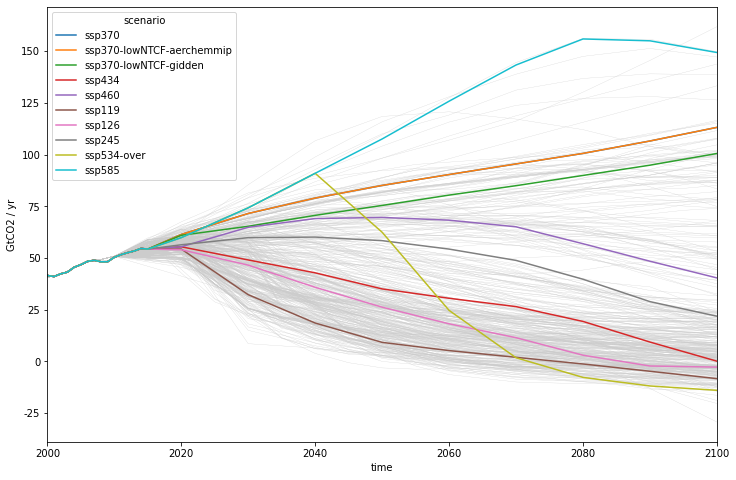

<IPython.core.display.Javascript object>

In [28]:
fig, ax = plt.subplots(figsize=(12, 8))
gwp = "AR6GWP100"

ghgs["id"] = ghgs["model"] + ghgs["scenario"]
ghgs.filter(unit_context=gwp).lineplot(
    hue=None, units="id", estimator=None, color="0.8", linewidth=0.25, time_axis="year"
)
ax = (
    rcmip_data_ghg_emms.filter(unit_context=gwp, year=range(2000, 2100 + 1))
    .filter(region="World", scenario="ssp*")
    .lineplot(ax=ax, time_axis="year")
)
ax.set_xlim([2000, 2100])